In [294]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [295]:
%matplotlib notebook

In [303]:
data = pd.read_hdf('/mnt/raw/clean/labelled.h5', 'data')

In [304]:
columns = {
    "FFY28016.P01" : "T1_T2_Ratio",
    "TH006RATIO.CPV" : "T12_T3_Ratio",
    
    "3311WI671.PV" : "Spewput",
    "3311HS181A.PV" : "Throughput",
    
    "CalcCY03FRC1.CPV" : "T1_Size",
    "CY02FRC1.CPV" : "T2_Size",
    "3313AI531.PV" : "T3_Size",

    "MIY22937.CPV" : "T1_Output",
    "MIY22953.CPV" : "T2_Output",
    "3312FY078.CPV" : "T3_Output",

    "3311WIC151.PV" : "1Speed",
    "SIC22371.MV" : "MillSpeed",
}

In [305]:
data.rename(columns=columns, inplace=True)

<IPython.core.display.Javascript object>


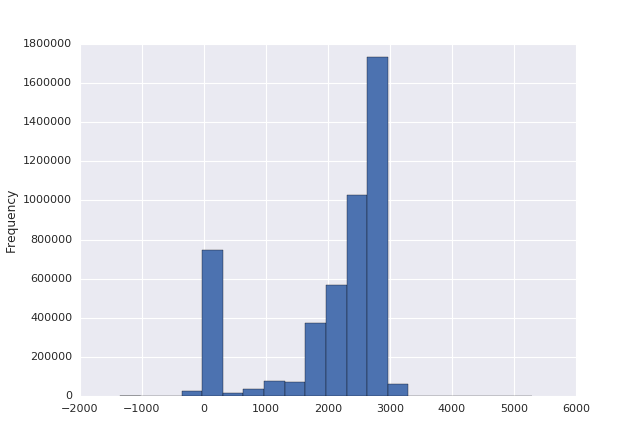

In [308]:
data.Throughput.plot.hist(bins=20)

<IPython.core.display.Javascript object>


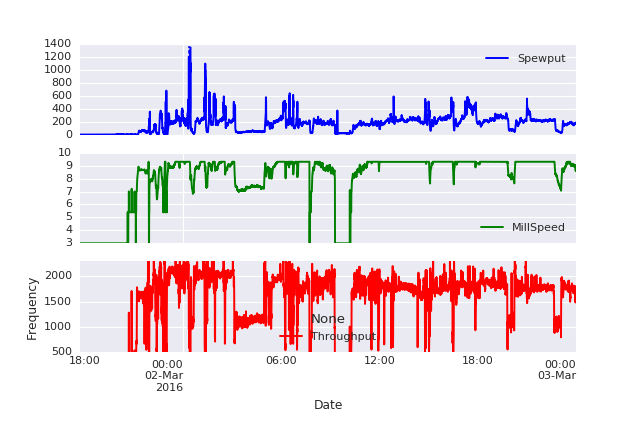

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f395eb684e0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f395eadef60>], dtype=object)

In [306]:
slice = data.loc[pd.Timestamp('2016-03-01 00:00') : pd.Timestamp('2016-03-03 00:00')]
slice[["Spewput", "MillSpeed", "Throughput"]].plot(subplots=True, sharex=True)

In [286]:
SPEW_THRESHOLD = 300

SAMPLE_FREQ = pd.Timedelta('00:00:05')
SPEW_RECOVERY_TIME = pd.Timedelta('00:20:00')
PRE_SPEW_WARNING = pd.Timedelta('00:03:00')

INVALID_THRESHOLD = 2200
INVALID_RECOVERY_TIME = pd.Timedelta('00:20:00')

In [287]:
invalid = data.Throughput < INVALID_THRESHOLD
invalid = pd.rolling_sum(invalid, window = INVALID_RECOVERY_TIME / SAMPLE_FREQ, center=True) > 0

In [288]:
spewing = data.Spewput > SPEW_THRESHOLD
afterspew = pd.rolling_sum(spews, window = SPEW_RECOVERY_TIME / SAMPLE_FREQ) > 1
spew_event = spewing & (~afterspew)

In [289]:
prespew = (pd.rolling_sum(spews[::-1], window= PRE_SPEW_WARNING / SAMPLE_FREQ)[::-1] > 0) & (~spew_event) & (~afterspew)

In [290]:
slice = data.loc[pd.Timestamp('2016-03-07') : pd.Timestamp('2016-03-09')]

<IPython.core.display.Javascript object>


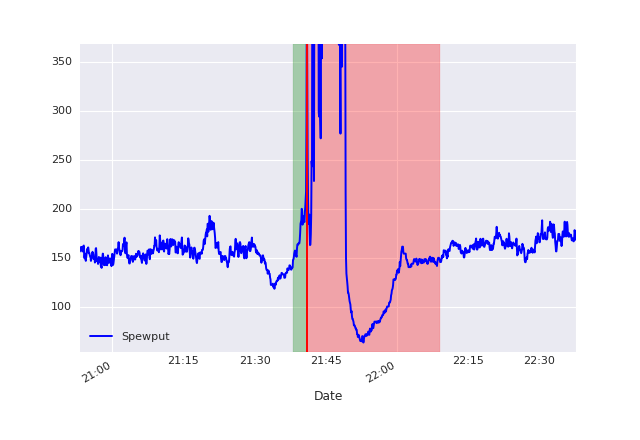

In [292]:
slice[["Spewput"]].plot(subplots=True, sharex=True)

#spew event lines
for time, spew in spew_event[spew_event == True].iteritems():
    plt.axvline(time, color='r')

#post spew
for begin, end in zip(
    afterspew[(afterspew.diff()!= 0) & afterspew].index,
    afterspew[(afterspew.diff()!= 0) & ~afterspew].iloc[1:].index
):
    plt.axvspan(begin, end, color='r', alpha = 0.3)
    
#pre spew
for begin, end in zip(
    prespew[(prespew.diff()!= 0) & prespew].index,
    prespew[(prespew.diff()!= 0) & ~prespew].iloc[1:].index
):
    plt.axvspan(begin, end, color='g', alpha = 0.3)

<IPython.core.display.Javascript object>


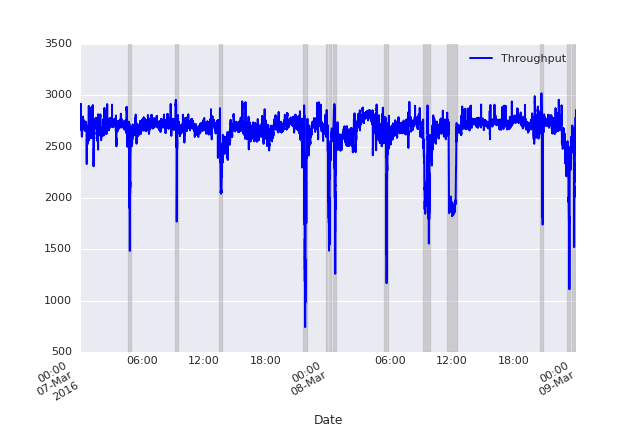

In [293]:
slice[["Throughput"]].plot(subplots=True, sharex=True)

for begin, end in zip(
    invalid[(invalid.diff()!= 0) & invalid].index,
    invalid[(invalid.diff()!= 0) & ~invalid].iloc[1:].index
):
    plt.axvspan(begin, end, color='grey', alpha = 0.3)